In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from scipy.special import boxcox1p

In [9]:
#Import
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train = train.replace({'male': 0, 'female': 1})
test = test.replace({'male': 0, 'female': 1})
print(train.shape,test.shape)
train.head()

(891, 12) (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text yticklabel objects>)

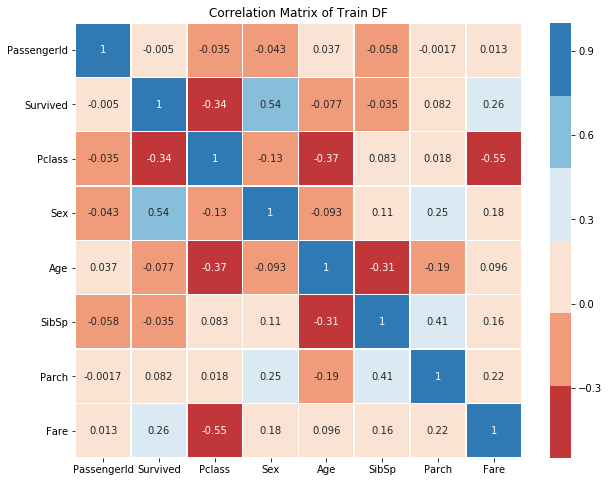

In [10]:
plt.figure(figsize = (10,8))
sns.heatmap(train.corr(), cmap= sns.color_palette(palette="RdBu"),linewidths=.5,annot=True)
plt.title("Correlation Matrix of Train DF")
plt.yticks(rotation = "0")

In [17]:
train.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex            0.543351
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [22]:
corrmat = train.corr()
k = train.shape[1]
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(train[cols].values.T)
l = cols[np.argsort(np.abs(cm[0]))[::-1][1:]].values#n+1 because just 1:1 gives the index only

In [23]:
cols

Index(['Survived', 'Sex', 'Fare', 'Parch', 'PassengerId', 'SibSp', 'Age',
       'Pclass'],
      dtype='object')

In [26]:
l[1:]

array(['Sex', 'Pclass', 'Fare', 'Parch', 'SibSp', 'PassengerId'],
      dtype=object)